Task 2.2 
Supervised preprocessing and visualization

In [7]:
import pandas as pd

# Lade das Dataset
df = pd.read_csv('diabetes.csv')

# Vorschau
print(df.head())

   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


In [17]:
import numpy as np

def replace_zeros_with_nan(df, feature_list):
    """
    Ersetzt 0 durch NaN in den angegebenen Features.
    """
    df[feature_list] = df[feature_list].replace(0, np.nan)
    return df

# Zuerst Nullwerte in bestimmten Features durch NaN ersetzen
zero_invalid_features = ['plas', 'pres', 'skin', 'insu', 'mass']
df = replace_zeros_with_nan(df, zero_invalid_features)

# Dann IQR-Outlier entfernen (wie gehabt)
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    df.loc[outliers, col] = np.nan

# Danach alle vollständigen Zeilen behalten
df_clean = df.dropna()

In [18]:
import numpy as np

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~series.between(lower_bound, upper_bound)

# Wende das auf numerische Spalten an
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    df.loc[outliers, col] = np.nan

In [19]:
# Entferne Zeilen mit NaN
df_clean = df.dropna()

print(f"Original shape: {df.shape}, Clean shape: {df_clean.shape}")

Original shape: (768, 9), Clean shape: (321, 9)


In [20]:
# Kurzinfo über numerische Daten
print(df_clean.describe())

             preg        plas        pres        skin        insu        mass  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean     3.121495  118.320872   70.386293   28.264798  125.433022   32.303115   
std      2.955007   28.908257   10.916172   10.184316   65.910897    6.328699   
min      0.000000   56.000000   44.000000    7.000000   15.000000   18.200000   
25%      1.000000   97.000000   62.000000   20.000000   74.000000   27.600000   
50%      2.000000  114.000000   70.000000   28.000000  115.000000   32.800000   
75%      5.000000  136.000000   78.000000   35.000000  168.000000   36.500000   
max     13.000000  198.000000  102.000000   52.000000  310.000000   49.700000   

             pedi         age  
count  321.000000  321.000000  
mean     0.461583   29.850467  
std      0.235719    9.195247  
min      0.085000   21.000000  
25%      0.267000   23.000000  
50%      0.426000   26.000000  
75%      0.631000   34.000000  
max      1.096

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Zielvariable
X = df_clean.drop("class", axis=1)
y = df_clean["class"]

# Skaliere für Chi²
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Chi² Score + p-Werte
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)

# Scores und p-Werte extrahieren
scores = selector.scores_
p_values = selector.pvalues_

# Ergebnis als DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)

  Feature  Chi2 Score   p-value
7     age    9.250752  0.002354
1    plas    8.010892  0.004650
4    insu    5.334560  0.020907
0    preg    4.319794  0.037671
6    pedi    1.837476  0.175247
5    mass    1.798836  0.179853
3    skin    1.752455  0.185568
2    pres    1.090338  0.296396


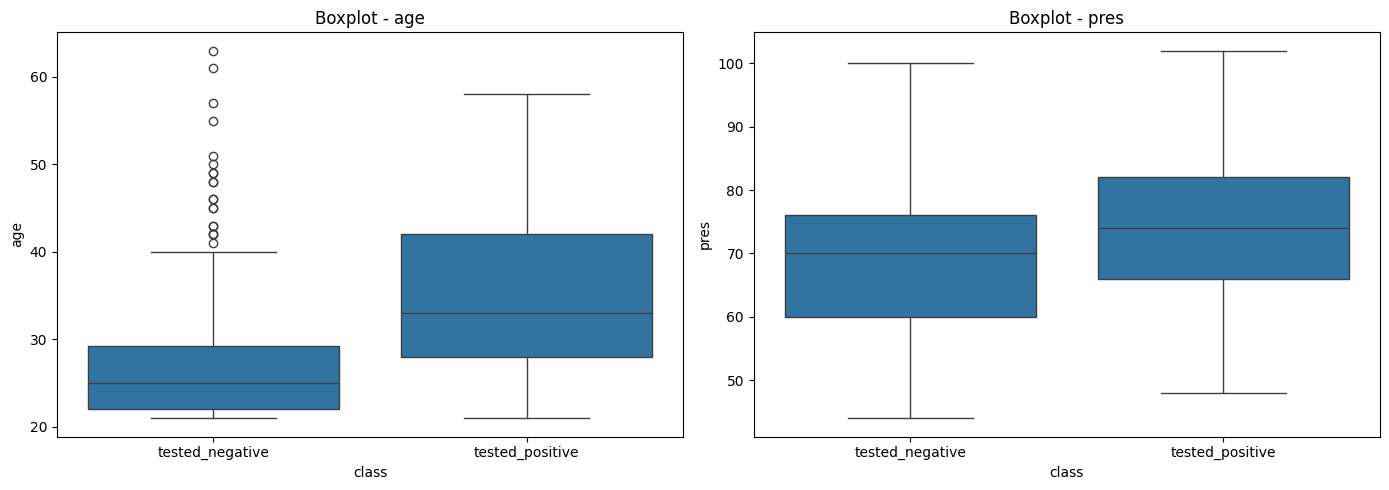

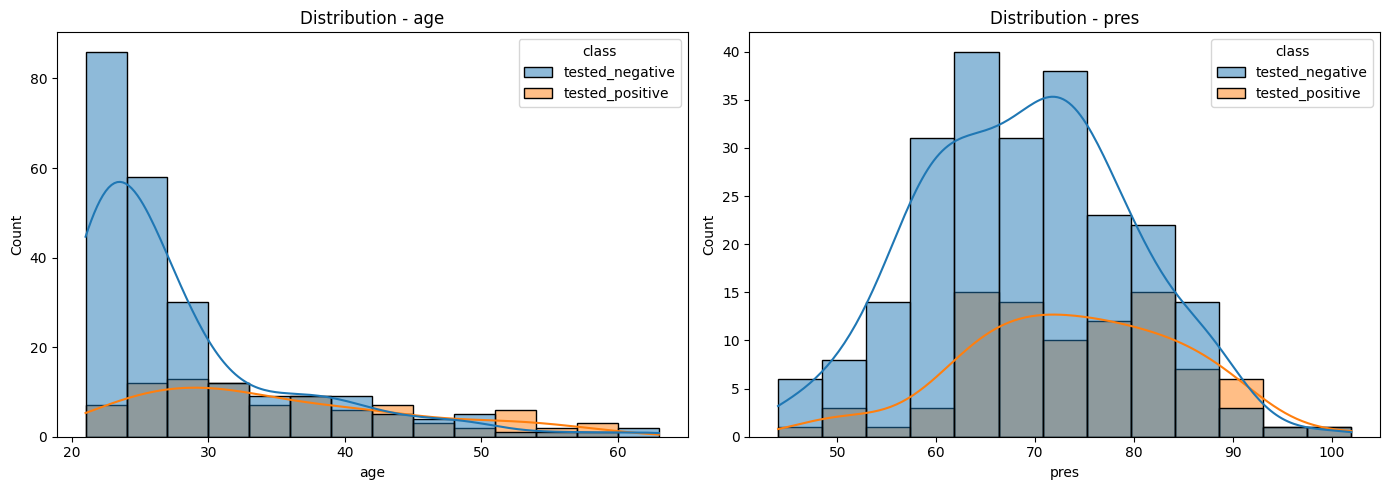

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bestes & schlechtestes Feature aus Schritt 5
best_feature = feature_scores.iloc[0]['Feature']
worst_feature = feature_scores.iloc[-1]['Feature']

# Boxplots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='class', y=best_feature, data=df_clean)
plt.title(f'Boxplot - {best_feature}')

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y=worst_feature, data=df_clean)
plt.title(f'Boxplot - {worst_feature}')

plt.tight_layout()
plt.show()

# Verteilungen mit KDE
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x=best_feature, hue='class', kde=True)
plt.title(f'Distribution - {best_feature}')

plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x=worst_feature, hue='class', kde=True)
plt.title(f'Distribution - {worst_feature}')

plt.tight_layout()
plt.show()

In [12]:
print(df_clean.columns)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')
